# Diadic operations

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Green screen application

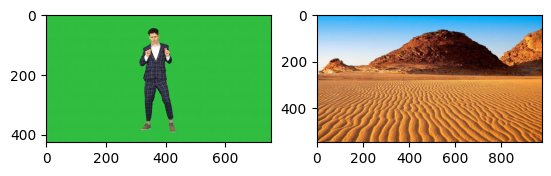

In [2]:
# Load two images
image_1 = cv2.imread('../../data/greenscreen_1.jpg')
image_2 = cv2.imread('../../data/greenscreen_2.jpg')

# Convert from BGR-space to RGB-space
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

# Show images
plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.show()

150


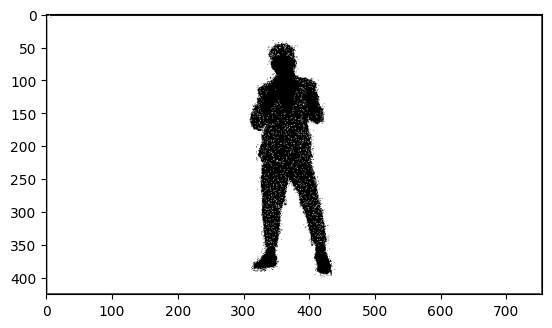

In [3]:
# Convert image from RGB-space to HSV-space for easy thresholding
hsv = cv2.cvtColor(image_1, cv2.COLOR_BGR2HSV)
print(hsv[0, 0, 0])

# Define green range in HSV-space (the parameters can be tuned using calibration to obtain better results)
lower_range = np.array([45, 0, 0])
upper_range = np.array([49, 255, 255])

# Make mask (pixels within range receive value 255, other pixels receive value 0)
mask = cv2.inRange(image_1, lower_range, upper_range)

# Show
plt.imshow(mask, cmap='gray')
plt.show()

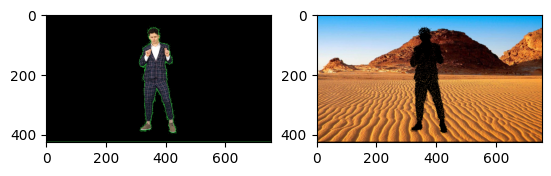

In [4]:
# Make images same size so they are compatible
image_2 = cv2.resize(image_2, (image_1.shape[1], image_1.shape[0]) )

# In the first image, set the background (where the mask values equal to 255) to zero in RGB space ([0, 0, 0])
image_1[mask == 255] = [0, 0, 0]

# In the second image, set the place where the person needs to be (where the mask values equal to 0) to zero in RGB space ([0, 0, 0])
image_2[mask == 0] = [0, 0, 0]

# Show images
plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.show()

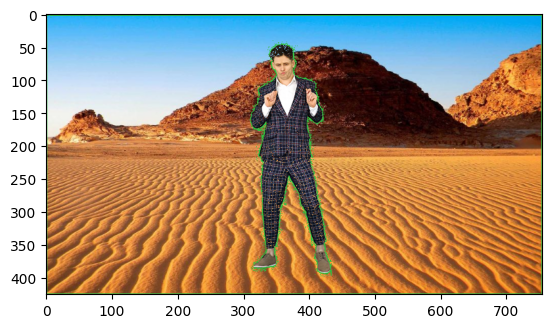

In [5]:
# Add the two images
complete_image = image_1 + image_2

# Show
plt.imshow(complete_image)
plt.show()

## Motion detection

In [6]:
# Get video object
vidcap = cv2.VideoCapture('../../data/motion_detection.mp4')

# Go to first frame and save this frame
success,image = vidcap.read()
cv2.imwrite('../../data/motion_detection_1.jpg', image)     # save frame as JPEG file  

# Go to second frame and save this frame
success,image = vidcap.read()
cv2.imwrite('../../data/motion_detection_2.jpg', image)     # save frame as JPEG file  

True

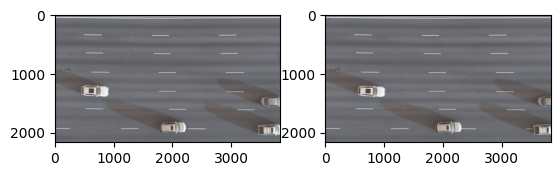

In [7]:
# Load images
image1 = cv2.imread('../../data/motion_detection_1.jpg')
image2 = cv2.imread('../../data/motion_detection_2.jpg')

# Show images
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.show()

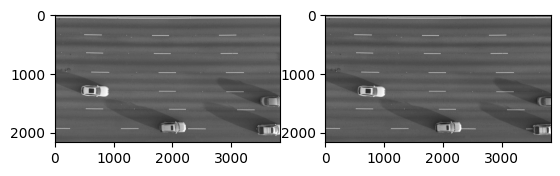

In [8]:
# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Show images
plt.subplot(1, 2, 1)
plt.imshow(gray1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.show()

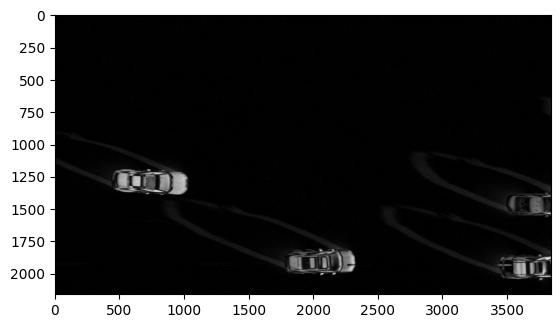

In [9]:
# Calculate difference
diff_frame = cv2.absdiff(gray1, gray2)

# Show image
plt.imshow(diff_frame, cmap='gray')
plt.show()